In [1]:
import cv2
import os

# video-path : Chemin de la vidéo à traiter
# output_folder : Dossier de destination
def video_to_frames(video_path, output_folder, frames_number):    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Chargement de la vidéo
    video_capture = cv2.VideoCapture(video_path)

    # Calcul du pas entre chaque frame pour obtenir le nombre requis
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_indices = [int(i * (total_frames - 1) / (frames_number - 1)) for i in range(frames_number)]

    # Lecture et extraction des frames
    count = 0  # Compteur pour nommer les frames
    extracted_frames = 0

    while True:
        success, image = video_capture.read()

        if not success:
            break

        if count in frames_indices:
            frame_path = os.path.join(output_folder, f"frame{extracted_frames}.jpg")
            cv2.imwrite(frame_path, image)
            extracted_frames += 1

        count += 1

    # Libération de la ressource vidéo
    video_capture.release()

In [2]:

output_folder1 = 'images'
video_path1 = 'Personne_qui_marche.mp4'

video_to_frames(video_path1, output_folder1, 100)

In [3]:
import ast
import os.path
from xml.dom import minidom

out_dir = './out'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

file = minidom.parse('annotations.xml')

images = file.getElementsByTagName('image')

for image in images:
    width = int(image.getAttribute('width'))
    height = int(image.getAttribute('height'))
    name = image.getAttribute('name')
    elem = image.getElementsByTagName('points')
    boxes = image.getElementsByTagName('box')  # Obtenez toutes les balises box pour cette image

    if len(boxes) > 0:  # Vérifiez s'il y a des balises box pour cette image
        bbox = boxes[0]  # Prenez la première balise box
        xtl = int(float(bbox.getAttribute('xtl')))
        ytl = int(float(bbox.getAttribute('ytl')))
        xbr = int(float(bbox.getAttribute('xbr')))
        ybr = int(float(bbox.getAttribute('ybr')))
        w = xbr - xtl
        h = ybr - ytl
        label_file = open(os.path.join(out_dir, name[:-4] + '.txt'), 'w')

        for e in elem:
            label_file.write('0 {} {} {} {} '.format(str((xtl + (w / 2)) / width), str((ytl + (h / 2)) / height),
                                                     str(w / width), str(h / height)))

            points = e.attributes['points']
            points = points.value.split(';')
            points_ = []
            for p in points:
                p = p.split(',')
                p1, p2 = p
                points_.append([int(float(p1)), int(float(p2))])
            for p_, p in enumerate(points_):
                label_file.write('{} {}'.format(p[0] / width, p[1] / height))
                if p_ < len(points_) - 1:
                    label_file.write(' ')
                else:
                    label_file.write('\n')

ModuleNotFoundError: No module named 'xml2coco'

In [5]:
"""
Points clés: 17 points clés
nez, oeil gauche, oeil droit, oreille gauche, oreille droite, épaule gauche, épaule droite, coude gauche, coude droit,
poignet gauche, poignet droit, hanche gauche, hanche droite, genou gauche, genou droit, cheville gauche, cheville droite.
"""

from ultralytics import YOLO
import cv2
import os

# Chemin du dossier contenant les images
dossier_images = './images/'

# Charger le modèle pré-entraîné YOLO
model = YOLO('yolov8n-pose.pt')

def sauvegarder_keypoints(dossier_images, model):
    # Créer le dossier keypoints s'il n'existe pas
    dossier_keypoints = os.path.join(dossier_images, "../keypoints")
    os.makedirs(dossier_keypoints, exist_ok=True)

    for nom_fichier in os.listdir(dossier_images):
        if nom_fichier.endswith(".jpg") or nom_fichier.endswith(".jpeg") or nom_fichier.endswith(".png"):
            # Chemin complet de l'image
            chemin_image = os.path.join(dossier_images, nom_fichier)

            # Obtenir les résultats pour l'image
            results = model(chemin_image)[0]

            # Récupérer les keypoints à partir des résultats
            keypoints = results.keypoints.xy

            # Convertir les keypoints en liste
            keypoints_list = keypoints.tolist()

            # Enregistrer les keypoints dans un fichier texte
            fichier_sortie = os.path.splitext(nom_fichier)[0] + "_keypoints.txt"
            chemin_fichier_sortie = os.path.join(dossier_keypoints, fichier_sortie)

            with open(chemin_fichier_sortie, 'w') as fichier:
                for point_set in keypoints_list:
                    for point in point_set:
                        fichier.write(f"{point[0]} {point[1]} ")  # Écrire chaque paire de coordonnées avec un espace
                    fichier.write("\n")  # Passer à la ligne après chaque ensemble de keypoints

In [6]:
sauvegarder_keypoints(dossier_images, model)
print(keypoints_list)


image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame0.jpg: 384x640 1 person, 274.8ms
Speed: 4.6ms preprocess, 274.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame1.jpg: 384x640 1 person, 272.5ms
Speed: 4.6ms preprocess, 272.5ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame10.jpg: 384x640 1 person, 295.4ms
Speed: 3.1ms preprocess, 295.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame11.jpg: 384x640 1 person, 276.2ms
Speed: 0.9ms preprocess, 276.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame12.jpg: 384x640 1 perso


image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame42.jpg: 384x640 1 person, 290.4ms
Speed: 0.6ms preprocess, 290.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame43.jpg: 384x640 1 person, 311.9ms
Speed: 0.2ms preprocess, 311.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame44.jpg: 384x640 1 person, 289.3ms
Speed: 1.1ms preprocess, 289.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame45.jpg: 384x640 1 person, 275.4ms
Speed: 5.7ms preprocess, 275.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame46.jpg: 384x640 1 pers


image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame76.jpg: 384x640 1 person, 296.2ms
Speed: 0.0ms preprocess, 296.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame77.jpg: 384x640 1 person, 335.1ms
Speed: 3.0ms preprocess, 335.1ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame78.jpg: 384x640 1 person, 278.0ms
Speed: 5.0ms preprocess, 278.0ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame79.jpg: 384x640 1 person, 282.5ms
Speed: 1.1ms preprocess, 282.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\boqua\ProjetM1\PoseEstimationFeatures\Personne_qui_marche\images\frame8.jpg: 384x640 1 per

NameError: name 'keypoints_list' is not defined

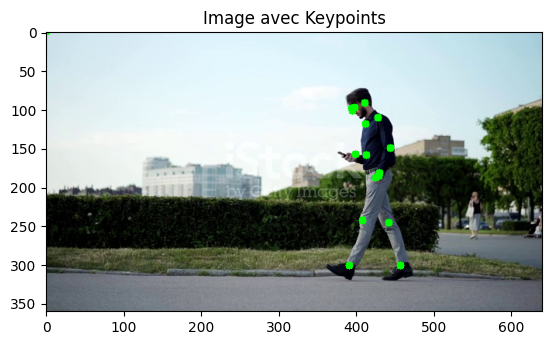

In [35]:
image = cv2.imread(image_path)
import matplotlib.pyplot as plt

for result in results:
    nk = keypoints.shape[1]
    
    for i in range(nk):
        keypoint = keypoints[0, i]
        x, y = int(keypoint[0].item()), int(keypoint[1].item())
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)


# Afficher l'image avec les keypoints en utilisant matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image avec Keypoints')
plt.show()

In [20]:
import xml.etree.ElementTree as ET
import json

def convert_xml_to_coco_keypoints(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    images = []

  tofor image in root.findall('image'):
        image_info = {
            "image_id": int(image.get('id')),
            "file_name": image.get('name'),
            "width": int(image.get('width')),
            "height": int(image.get('height')),
            "annotations": []
        }

        for points in image.findall('points'):
            keypoints = []
            for point in points.get('points').split(';'):
                x, y = point.split(',')
                keypoints.extend([float(x), float(y), 2])  # Adding keypoint information (x, y, visibility)

            annotation = {
                "keypoints": keypoints,
                "category_id": 1,  # Assuming there's only one category 'Human'
                "iscrowd": 0
            }

            box = image.find('box')
            if box is not None:
                bbox_attrs = ['xtl', 'ytl', 'xbr', 'ybr']
                annotation["bbox"] = [float(box.get(attr)) for attr in bbox_attrs]

            image_info["annotations"].append(annotation)

        images.append(image_info)

    coco_format = {
        "images": images,
        "categories": [{"id": 1, "name": "Human", "supercategory": "person"}]
    }

    with open('output_coco.json', 'w') as outfile:
        json.dump(coco_format, outfile, indent=4)

# Utilisation de la fonction avec le fichier XML en entrée
convert_xml_to_coco_keypoints('annotations.xml')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [23]:
import xml.etree.ElementTree as ET

def extract_information(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    tracks = {}

    for track in root.findall('.//track[@label="human"]'):
        track_id = track.attrib['id']
        tracks[track_id] = {'points': {}, 'boxes': {}}

        for frame_data in track:
            frame_number = int(frame_data.attrib['frame'])

            if frame_data.tag == 'points':
                points = frame_data.attrib['points']
                tracks[track_id]['points'][frame_number] = points

        for frame_data in track:
            frame_number = int(frame_data.attrib['frame'])

            if frame_data.tag == 'box':
                xtl = float(frame_data.attrib['xtl'])
                ytl = float(frame_data.attrib['ytl'])
                xbr = float(frame_data.attrib['xbr'])
                ybr = float(frame_data.attrib['ybr'])
                tracks[track_id]['boxes'][frame_number] = {'xtl': xtl, 'ytl': ytl, 'xbr': xbr, 'ybr': ybr}

    return tracks

# Utilisation de la fonction avec le fichier XML en entrée
track_data = extract_information('annotations.xml')

# Affichage des données extraites triées par numéro de frame
for track_id, data in track_data.items():
    print(f"Track ID: {track_id}")
    print("  Points:")
    for frame_number in sorted(data['points']):
        print(f"    Frame: {frame_number}, Points: {data['points'][frame_number]}")
    print("  Boxes:")
    for frame_number in sorted(data['boxes']):
        box_data = data['boxes'][frame_number]
        print(f"    Frame: {frame_number}, Box: {box_data['xtl']}, {box_data['ytl']}, {box_data['xbr']}, {box_data['ybr']}")


Track ID: 0
  Points:
    Frame: 20, Points: 340.40,954.40;341.50,988.50;286.00,1032.10;405.30,1031.40;267.80,1125.90;436.10,1119.30;252.30,1220.30;452.60,1215.00;250.80,1251.30;454.80,1234.80;310.70,1198.50;396.50,1191.90;324.00,1360.20;376.70,1366.76;343.30,1456.50;385.80,1481.60;344.30,1482.30;386.90,1509.20
    Frame: 21, Points: 340.40,954.40;341.50,988.50;286.00,1032.10;405.30,1031.40;267.80,1125.90;436.10,1119.30;252.30,1220.30;452.60,1215.00;250.80,1251.30;454.80,1234.80;310.70,1198.50;396.50,1191.90;324.00,1360.20;376.70,1366.76;343.30,1456.50;385.80,1481.60;344.30,1482.30;386.90,1509.20
  Boxes:
Track ID: 1
  Points:
  Boxes:
    Frame: 20, Box: 220.0, 913.16, 477.3, 1533.4
    Frame: 21, Box: 220.0, 913.16, 477.3, 1533.4
Track ID: 2
  Points:
    Frame: 40, Points: 328.84,959.68;328.84,990.69;272.64,1033.33;396.67,1037.20;253.26,1118.60;408.30,1118.60;251.32,1196.13;425.74,1221.32;259.07,1211.63;429.62,1248.45;293.95,1182.56;371.48,1180.62;321.09,1335.67;365.66,1333.73;340.4

In [3]:
from ultralytics import YOLO


model = YOLO('yolov8n-pose.pt')  # load a pretrained model (recommended for training)

model.train(data='config.yaml', epochs=1, imgsz=640)